**Monte Carlo**

The method Carlo method is used to estimate a value by using the empirical mean.

Let's say we want to estimate this integral:
$$I = \int_{a}^{b} g(x) dx = \int_{a}^{b} e^{4x} dx$$

We can use a known probability $X$ with mass function $f$ to estimate $I$:
$$\hat{I} = \int_{a}^{b} \frac{e^{4x}}{f(x)} f(x) dx = E\left(\frac{e^{4X}}{f(X)}\right)$$


$X_1$, $X_2$, ... $X_N$ follow the same probability $X$ and are IID.

Thus, giving the law of large numbers, the empirical mean converge almost surely when $N\to\infty$:
$$E\left(\frac{e^{4X}}{f(X)}\right) = \frac{1}{N} \sum_{i=1}^{N} \frac{e^{4X_i}}{f(X_i)} \xrightarrow[A.S.]{n\to\infty} \int_{a}^{b} e^{4x} dx$$

In [2]:
import math
import numpy as np
from random import uniform
import matplotlib.pyplot as plt

import sympy
from sympy.interactive import printing
printing.init_printing(use_latex="mathjax")

Computed value:  40688.4478547510
Monte-Carlo = 42106.12914949469    Expected value = 40688.44785475098    Error = -1417.6812947437138    Variance = 8850349992.365507


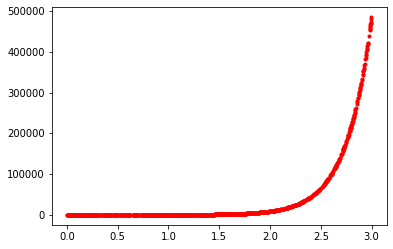

In [3]:
# Parameters
N = 1000
a = 0
b = 3

# Expected value
I = (math.exp(4.0 * b) - math.exp(4.0 * a)) / 4.0

# Computed value
t = sympy.Symbol("t")
print("Computed value: ", sympy.integrate(sympy.exp(4.0 * t), (t, a, b)))

# Generate Uniform distribution X
X = [np.random.uniform(a, b, 1) for _ in range(N)]
Y = [(b - a) * math.exp(4.0 * x) for x in X]

# Empirical mean
Im = np.sum(Y) / float(N)

# Variance
v = 0.0
for y in Y:
    v += (y - Im)**2
v = (v / float(N))**0.5

print("Monte-Carlo = {}    Expected value = {}    Error = {}    Variance = {}".format(Im, I, I-Im, v))
    
# Plot
plt.plot(X, Y, 'r.')
plt.show()

Monte-Carlo = 40262.29781347717    Expected value = 40688.44785475098    Error = 426.1500412738096


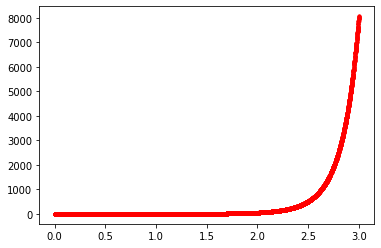

In [39]:
# Parameters
N = 100000
a = 0
b = 3

# Expected value
I = (math.exp(4.0 * b) - math.exp(4.0 * a)) / 4.0

s = 0.0
for i in range(N):
    # Generate Uniform distribution X
    x = uniform(a, b)
    s += math.exp(4.0 * x)

# Empirical mean
Im = (b - a) * s / float(N)
print("Monte-Carlo = {}    Expected value = {}    Error = {}".format(Im, I, abs(I - Im)))

# Plot
plt.plot(X, Y, 'r.')
plt.show()

In [34]:
# Example 2 - g(x) - a = 1 - b = 3
N = 100_000

# Expected value
I = 1464.2

s = 0.0
for i in range(N):
    # Generate Uniform distribution X
    x = uniform(1, 3)
    s += math.exp(x**2)

# Empirical mean
Im = 2.0 * s / float(N)
print("Monte-Carlo = {}    Expected value = {}    Error = {}".format(Im, I, abs(I - Im)))

# Plot
#plt.plot(X, Y, 'r.')
#plt.show()

Monte-Carlo = 1453.8056650912201    Expected value = 1464.2    Error = 10.39433490877991
